UTFPR – UNIVERSIDADE TECNOLÓGICA FEDERAL DO PARANÁ

DAELT – DEPARTAMENTO ACADÊMICO DE ELETROTÉCNICA

Disciplina: ET7GF – Sinais e Sistemas 2

Professor: Glauber Brante

Aluno: Douglas Dangui Pedroso

Atividade de Simulação 10

Projeto de Filtros FIR por Funções Janela

EXERCÍCIO 1: Filtros Rejeita-Faixa com Especificações em Frequência

Considere as seguintes especificações para um filtro rejeita-faixa:

• Ap = 1 dB

• Ar = 45 dB

• ωp1 = 800 Hz

• ωr1 = 950 Hz

• ωr2 = 1350 Hz

• ωp2 = 1500 Hz

• ωs = 6000 Hz

a) Projete uma Janela de Kaiser (wK[n]) para atender às especificações acima.

Calcule a janela utilizando o procedimento visto em aula e trace wK[n] em função do tempo discreto n.

In [1]:
#Laboratório 10
from matplotlib.pyplot import *
from numpy import *
from scipy import signal
close('all')

def retangulo(n,N):
    d = 1*(abs(n) <= N)
    return d

D:\Douglas\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in true_divide
D:\Douglas\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in multiply


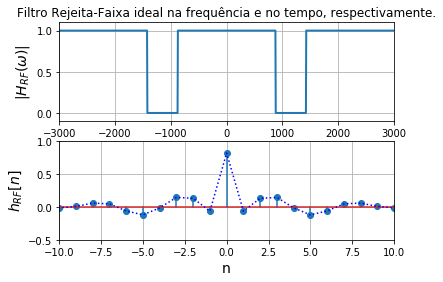

In [2]:
#%% Laboratório 10

Ap = 1
Ar = 45
wp1 = 800
wr1 = 950
wr2 = 1350
wp2 = 1500
ws = 6000

# Desenvolvimento dos cálculos
Tr = min(abs(wr1-wp1),abs(wr2-wp2)) #Tr = faixa de transição, é positivo para rejeita-faixa e negativo para passa-faixa

# Determinação das duas frequências de corte centralizadas na faixa de transição
wc1 = wp1 + Tr/2
wc2 = wp2 - Tr/2

# Determinação da ondulação de passagem
delp = (10**(Ap/20) - 1)/(10**(Ap/20) + 1)

# Determinação ondulação da rejeição
delr = 10**(-Ar/20)

# Janela de Kaiser aceita apenas ondulação igual, por isso escolhe-se a menor ondulação
delm = min(delr,delp)

# Recalcular máxima ondulação na faixa de passagem Ap e a mínima ondulação na faixa de passagem de Rejeição Ar 
Ap = 20*log10((1+delm)/(1-delm))
Ar = -20*log10(delm)

# Cálculo do Beta
if Ar <= 21:
    Beta = 0
elif Ar > 21 and Ar <= 50:
    Beta = 0.5842*(Ar - 21)**(0.4) + 0.07886*(Ar - 21)
else:
    Beta = 0.1102*(Ar - 8.7)

# Calcular o comprimento normalizado da janela
if Ar <= 21:
    D = 0.9222
else:
    D = (Ar - 7.95)/14.36
    
# Cáculo da ordem M do filtro
M = int(ceil(ws*D/Tr))
N = M + 1

tam_fft = 500000
f = linspace(0, ws, tam_fft)
 
# FRF Ideal (na frequência)
w = linspace(-ws/2, ws/2, 1000)
HRF = 1 - (retangulo(w-(wc1+wc2)/2, (wc2-wc1)/2) + retangulo(w+(wc1+wc2)/2, (wc2-wc1)/2))

n = arange(int(-M/2), int(M/2)+1)
hrf = 1/(pi*n)*(sin(2*pi*wc1*n/ws) - sin(2*pi*wc2*n/ws))
hrf[int(M/2)] = 1 - (2*pi*wc2-2*pi*wc1)/(pi*ws)

clf()
figure(1)
subplot(2,1,1)
plot(w, HRF, linewidth=2)
grid(True)
axis([-ws/2, ws/2, -0.1, 1.1])
xlabel('$\omega$',fontsize=14)
ylabel('$|H_{RF}(\omega)|$',fontsize=14)
title('Filtro Rejeita-Faixa ideal na frequência e no tempo, respectivamente.')
subplot(2,1,2)
stem(n, hrf)
plot(n, hrf, 'b:')
grid(True)
axis([-10, 10, -0.5, 1])
xlabel('n',fontsize=14)
ylabel('$h_{RF}[n]$',fontsize=14)
show()

Text(0.5,1,'Janela Kaiser com algoritmo próprio.')

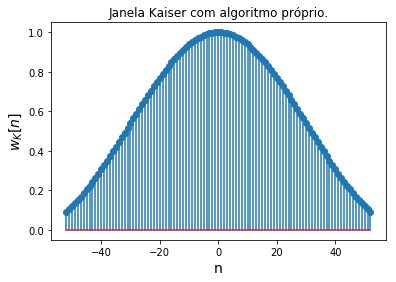

In [3]:
#%%
# Janela de Kaiser
wk = i0(Beta*sqrt(1 - (2*n/M)**2))/i0(Beta)
wk1 = []
for i in arange(0,M+1):
    if isnan(wk[i]) == 0:
        wk1 = append(wk1,wk[i])

n1 = arange(int(-size(wk1)/2),int(size(wk1)/2+1))
# Resposta do exercício 1a
clf()
figure(1,figsize=[15,15])
stem(n1,wk1)
xlabel('n',fontsize=14)
ylabel('$w_{K}[n]$',fontsize=14)
title('Janela Kaiser com algoritmo próprio.')

b) Compare seus cálculos da janela de Kaiser com o comando kaiser(N,beta).

Text(0,0.5,'$w_{K}[n]$')

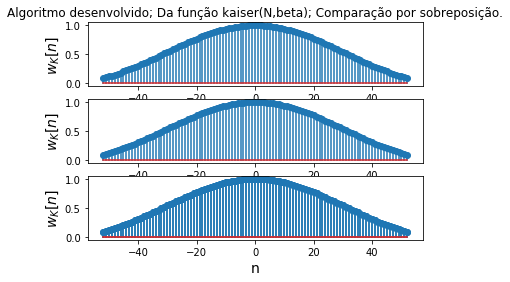

In [4]:
#%%
# Janela de Kaiser
wk = i0(Beta*sqrt(1 - (2*n/M)**2))/i0(Beta)
wk1 = []
for i in range(0,M+1):
    if isnan(wk[i]) == 0:
        wk1 = append(wk1,wk[i])

n1 = arange(int(-size(wk1)/2),int(size(wk1)/2+1))
wk2 = kaiser(N,Beta)
# Resposta do exercício 1b
clf()
figure(1,figsize=[15,15])
subplot(3,1,1)
stem(n1,wk1)
ylabel('$w_{K}[n]$',fontsize=14)
title('Algoritmo desenvolvido; Da função kaiser(N,beta); Comparação por sobreposição.')
subplot(3,1,2)
stem(n1,wk2)
ylabel('$w_{K}[n]$',fontsize=14)
subplot(3,1,3)
stem(n1,wk1)
stem(n1,wk2)
xlabel('n',fontsize=14)
ylabel('$w_{K}[n]$',fontsize=14)

c) Trace a magnitude da resposta em frequência de seu filtro:

     i.) Calcule a resposta ao impulso do filtro rejeita-faixa ideal (hrf[n]) e multiplique pela sua função janela;

    ii.) Obtenha a resposta em frequência de seu filtro fazendo a FFT.


Text(0,0.5,'$h_{RF}[n]$')

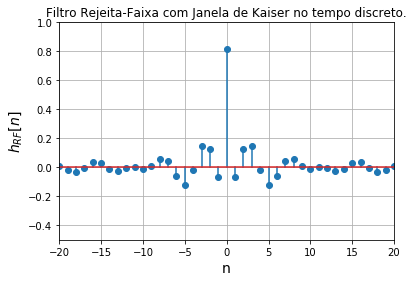

In [5]:
#%%
h = wk1*hrf
clf()
figure(1)
stem(n1,hrf)
grid(True)

axis([-20, 20, -0.5, 1])
title('Filtro Rejeita-Faixa com Janela de Kaiser no tempo discreto.')
xlabel('n',fontsize=14)
ylabel('$h_{RF}[n]$',fontsize=14)

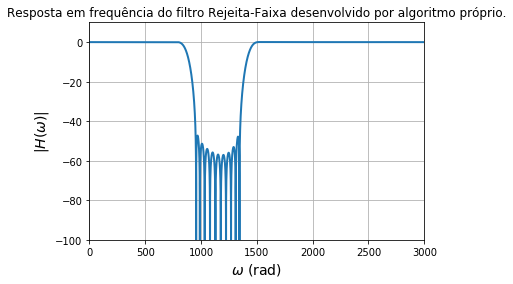

In [6]:
#%%
H = fft.fft(h,tam_fft)

mag1 = 20*log10(abs(H))

clf()
figure(1)
plot(f, mag1, lineWidth=2)
title('Resposta em frequência do filtro Rejeita-Faixa desenvolvido por algoritmo próprio.')
axis([0, ws/2, -100, 10])
ylabel('$|H(\omega)|$',fontsize=14)
xlabel('$\omega$ (rad)',fontsize=14)
grid(True)
show()

d) Compare os resultados com a utilização da Janela de Dolph-Chebyshev.

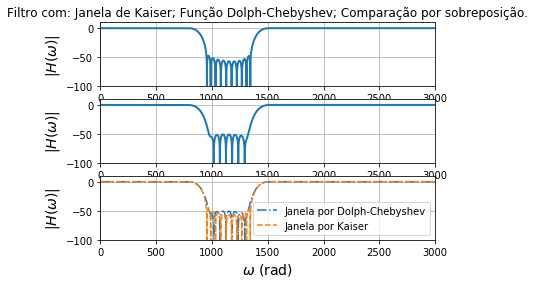

In [7]:
#%%
h = wk1*hrf
H = fft.fft(h,tam_fft)
mag1 = 20*log10(abs(H))

chebwindow = signal.chebwin(N,Ar)
h = chebwindow*hrf
H = fft.fft(h,tam_fft)
mag2 = 20*log10(abs(H))

clf()
figure(1)
subplot(3,1,1)
plot(f, mag1, lineWidth=2)
title('Filtro com: Janela de Kaiser; Função Dolph-Chebyshev; Comparação por sobreposição.')
axis([0, ws/2, -100, 10])
ylabel('$|H(\omega)|$',fontsize=14)
grid(True)

subplot(3,1,2)
plot(f, mag2, lineWidth=2)
axis([0, ws/2, -100, 10])
ylabel('$|H(\omega)|$',fontsize=14)
grid(True)

subplot(3,1,3)
plot(f, mag2, linestyle='-.')
plot(f,mag1,linestyle='--')
axis([0, ws/2, -100, 10])
legend(('Janela por Dolph-Chebyshev','Janela por Kaiser'))
xlabel('$\omega$ (rad)',fontsize=14)
ylabel('$|H(\omega)|$',fontsize=14)
grid(True)
show()

EXERCÍCIO 2: Filtros Passa-Altas Utilizando Funções-Janela

Usando o comando firwin, projete o seguinte filtro passa-altas usando a janela de Kaiser:

• Ap = 1 dB

• Ar = 40 dB

• ωr = 1000 rad/s

• ωp = 1200 rad/s

• ωs = 5000 rad/s

a) Trace a magnitude da resposta em frequência de seu filtro.


D:\Douglas\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide


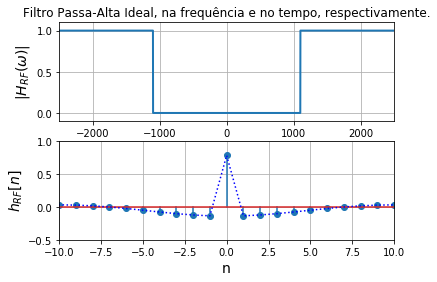

In [8]:
#%%

Ap = 1
Ar = 40
wr = 1000
wp = 1200
ws = 5000

# Desenvolvimento dos cálculos

# Determinação da frequência de corte
wc = (wp+wr)/2

# Determinação da ondulação de passagem
delp = (10**(Ap/20) - 1)/(10**(Ap/20) + 1)

# Determinação ondulação da rejeição
delr = 10**(-Ar/20)

# Janela de Kaiser aceita apenas ondulação igual, por isso escolhe-se a menor ondulação
delm = min(delr,delp)

# Recalcular máxima ondulação na faixa de passagem Ap e a mínima ondulação na faixa de passagem de Rejeição Ar 
Ap = 20*log10((1+delm)/(1-delm))
Ar = -20*log10(delm)

Tr = abs(wr - wp)

# Cálculo do Beta
if Ar <= 21:
    Beta = 0
elif Ar > 21 and Ar <= 50:
    Beta = 0.5842*(Ar - 21)**(0.4) + 0.07886*(Ar - 21)
else:
    Beta = 0.1102*(Ar - 8.7)

# Calcular o comprimento normalizado da janela
if Ar <= 21:
    D = 0.9222
else:
    D = (Ar - 7.95)/14.36
    
# Cáculo da ordem M do filtro
M = int(ceil(ws*D/Tr))
N = M + 1

tam_fft = 500000
f = linspace(0, ws, tam_fft)
 
# FPA Ideal (na frequência)
w = linspace(-ws/2, ws/2, ws)
HPA = append(ones(int(ws/2-wc)),append(zeros(int(2*wc)),ones(int(ws/2-wc))))

n = arange(int(-M/2), int(M/2)+1)
hpa = - sin(wc*n)/(pi*n)
hpa[int(M/2)] = 1-wc/ws

clf()
figure(1)
subplot(2,1,1)
plot(w, HPA, linewidth=2)
grid(True)
axis([-ws/2, ws/2, -0.1, 1.1])
xlabel('$\omega$',fontsize=14)
ylabel('$|H_{RF}(\omega)|$',fontsize=14)
title('Filtro Passa-Alta Ideal, na frequência e no tempo, respectivamente.')
subplot(2,1,2)
stem(n, hpa)
plot(n, hpa, 'b:')
grid(True)
axis([-10, 10, -0.5, 1])
xlabel('n',fontsize=14)
ylabel('$h_{RF}[n]$',fontsize=14)
show()

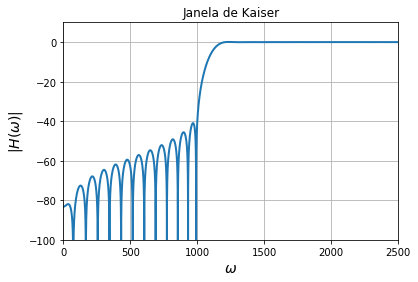

In [9]:
#%%
h = signal.firwin(N,wc,nyq=ws/2,pass_zero=False,window=('kaiser',Beta))
H = fft.fft(h,tam_fft)
mag1 = 20*log10(abs(H))
clf()
figure(1)
plot(f, mag1, lineWidth=2)
title('Janela de Kaiser')
axis([0, ws/2, -100, 10])
xlabel('$\omega$',fontsize=14)
ylabel('$|H(\omega)|$',fontsize=14)
grid(True)
show()

b) Qual a ordem do filtro obtida?

N = 57

c) Ainda usando o comando firwin, compare o resultado com o FPA utilizando as janelas retangular,
de Hamming, Hann e Blackman, todas com a mesma ordem que a obtida com a janela de Kaiser.

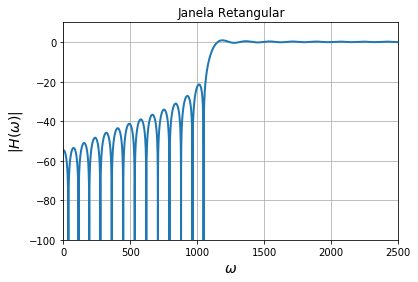

In [10]:
#%%
h = signal.firwin(N,wc,nyq=ws/2,pass_zero=False,window='boxcar')
H = fft.fft(h,tam_fft)
mag1 = 20*log10(abs(H))
clf()
figure(1)
plot(f, mag1, lineWidth=2)
title('Janela Retangular')
axis([0, ws/2, -100, 10])
xlabel('$\omega$',fontsize=14)
ylabel('$|H(\omega)|$',fontsize=14)
grid(True)
show()

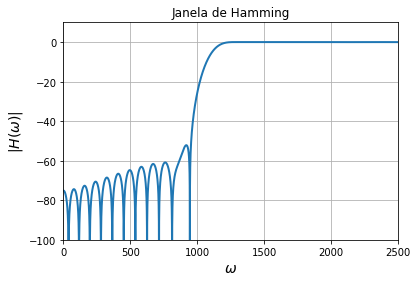

In [11]:
#%%
h = signal.firwin(N,wc,nyq=ws/2,pass_zero=False,window='hamming')
H = fft.fft(h,tam_fft)
mag1 = 20*log10(abs(H))
clf()
figure(1)
plot(f, mag1, lineWidth=2)
title('Janela de Hamming')
axis([0, ws/2, -100, 10])
xlabel('$\omega$',fontsize=14)
ylabel('$|H(\omega)|$',fontsize=14)
grid(True)
show()

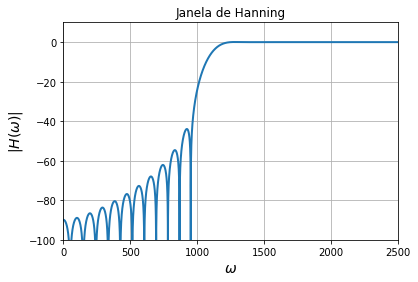

In [12]:
#%%
h = signal.firwin(N,wc,nyq=ws/2,pass_zero=False,window='hann')
H = fft.fft(h,tam_fft)
mag1 = 20*log10(abs(H))
clf()
figure(1)
plot(f, mag1, lineWidth=2)
title('Janela de Hanning')
axis([0, ws/2, -100, 10])
xlabel('$\omega$',fontsize=14)
ylabel('$|H(\omega)|$',fontsize=14)
grid(True)
show()

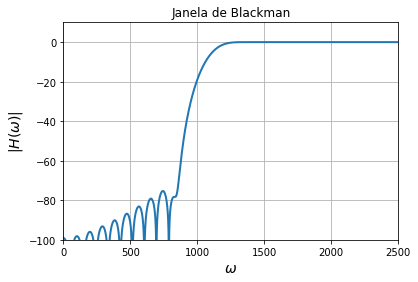

In [13]:
#%%
h = signal.firwin(N,wc,nyq=ws/2,pass_zero=False,window='blackman')
H = fft.fft(h,tam_fft)
mag1 = 20*log10(abs(H))
clf()
figure(1)
plot(f, mag1, lineWidth=2)
title('Janela de Blackman')
axis([0, ws/2, -100, 10])
xlabel('$\omega$',fontsize=14)
ylabel('$|H(\omega)|$',fontsize=14)
grid(True)
show()

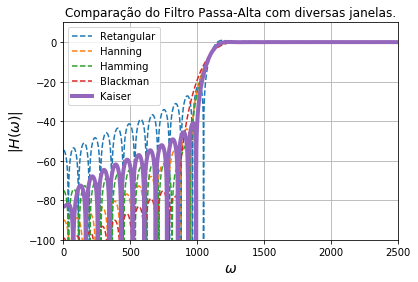

In [14]:
#%%
clf()
figure(1)

h = signal.firwin(N,wc,nyq=ws/2,pass_zero=False,window='boxcar')
H = fft.fft(h,tam_fft)
mag1 = 20*log10(abs(H))
plot(f, mag1,linestyle='--')

h = signal.firwin(N,wc,nyq=ws/2,pass_zero=False,window='hann')
H = fft.fft(h,tam_fft)
mag1 = 20*log10(abs(H))
plot(f, mag1,linestyle='--')

h = signal.firwin(N,wc,nyq=ws/2,pass_zero=False,window='hamming')
H = fft.fft(h,tam_fft)
mag1 = 20*log10(abs(H))
plot(f, mag1,linestyle='--')

h = signal.firwin(N,wc,nyq=ws/2,pass_zero=False,window='blackman')
H = fft.fft(h,tam_fft)
mag1 = 20*log10(abs(H))
plot(f, mag1,linestyle='--')

h = signal.firwin(N,wc,nyq=ws/2,pass_zero=False,window=('kaiser',Beta))
H = fft.fft(h,tam_fft)
mag1 = 20*log10(abs(H))
plot(f, mag1, lineWidth=4)
title('Comparação do Filtro Passa-Alta com diversas janelas.')
axis([0, ws/2, -100, 10])
legend(('Retangular','Hanning','Hamming','Blackman','Kaiser'))
xlabel('$\omega$',fontsize=14)
ylabel('$|H(\omega)|$',fontsize=14)
grid(True)
show()

EXERCÍCIO 3: Filtros Rejeita-Faixa Utilizando Funções-Janela

Repita o projeto para traçar a magnitude da resposta em frequência do Filtro Rejeita-Faixa do Exercício 1, com a janela de Kaiser, agora utilizando os comandos firwin e kaiserord. Qual o princípio de funcionamento desses comandos?

kaiserord é uma função que dá como resposta a ordem N do filtro e o valor de Beta dado as entradas Atenuação de Rejeição e Faixa de transição Normalizada.
firwin é uma função que dá o vetor de valores do filtro no tempo discreto.

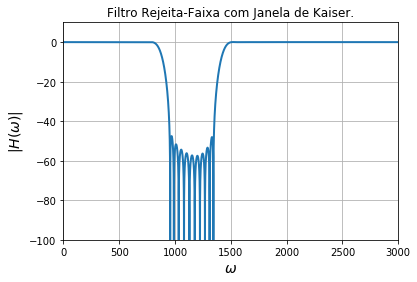

In [15]:
#%%
Ap = 1
Ar = 45
wp1 = 800
wr1 = 950
wr2 = 1350
wp2 = 1500
ws = 6000

# Determinação das duas frequências de corte centralizadas na faixa de transição
Tr = min(abs(wr1-wp1),abs(wr2-wp2))
wc1 = wp1 + Tr/2
wc2 = wp2 - Tr/2

tam_fft = 500000
f = linspace(0, ws, tam_fft)    
[N, beta] = signal.kaiserord(Ar,Tr/(0.5*ws))
h = signal.firwin(N,[wc1,wc2],nyq=ws/2,width=Tr,window=('kaiser',beta))
H = fft.fft(h,tam_fft)
mag1 = 20*log10(abs(H))
clf()
figure(1)
plot(f, mag1,lineWidth=2)
axis([0, ws/2, -100, 10])
title('Filtro Rejeita-Faixa com Janela de Kaiser.')
xlabel('$\omega$',fontsize=14)
ylabel('$|H(\omega)|$',fontsize=14)
grid(True)
show()